In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
%pylab inline



Populating the interactive namespace from numpy and matplotlib


The purpose of this notebook is to determine whether we can predict whether or not a cab rider paid cash based on where their trip started or ended. The answer is no.

In [9]:
yc200902_final = pd.read_csv("yc200902_final.csv")
yc200902_final["credit"] = ((yc200902_final["tipPC"] > 0) & (yc200902_final["Payment_Type"].str.lower() == "credit")).astype(np.int)
print "{}% credit".format(100. * yc200902_final["credit"].sum() / float(len(yc200902_final)))

22.7770922552% credit


When first playing with this, I was getting an accuracy of 77%, which corresponds to predicting "cash" every time. I wondered if this was due to the unbalanced class sizes, so I downsampled.

In [12]:
# downsampling to avoid unbalanced classes
ss = int(.2 * len(yc200902_final))
ds = pd.concat([yc200902_final[yc200902_final["credit"] > 0], 
               yc200902_final[yc200902_final["credit"] == 0].sample(ss, random_state=42)])

print "{}% credit".format(100. * ds["credit"].sum() / float(len(ds)))

53.2496181911% credit


Text(0.5,1,u'2009-02 taxi payment type (cash / credit) on income axes')

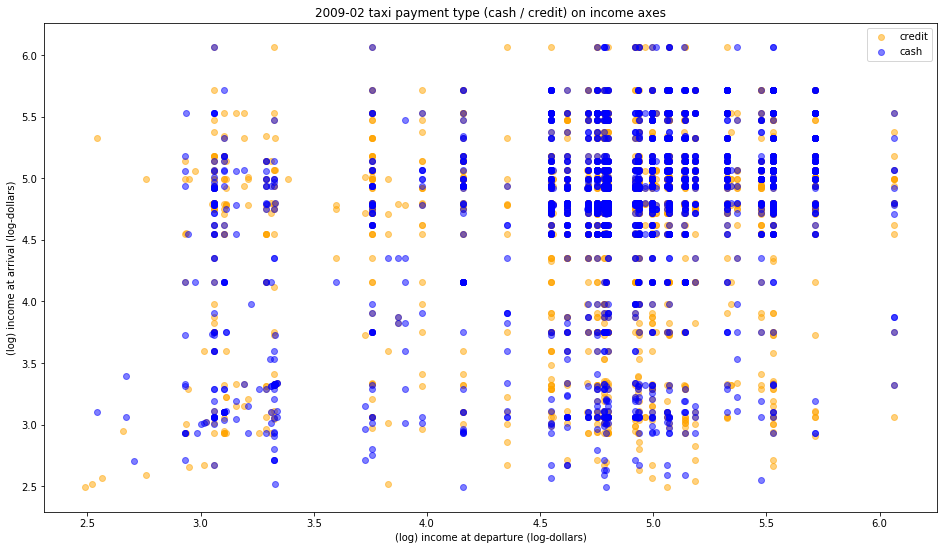

In [21]:
pl.figure(figsize=(16, 9))

credit = ds[ds["credit"] == 1]
cash = ds[ds["credit"] == 0]

pl.scatter(np.log(credit["depart_income"]),
           np.log(credit["arriv_income"]),
           c="orange",
           alpha=.5,
          label="credit")
pl.scatter(np.log(cash["depart_income"]),
           np.log(cash["arriv_income"]),
           c="blue",
           alpha=.5,
          label="cash")
pl.legend()
pl.xlabel("(log) income at departure (log-dollars)")
pl.ylabel("(log) income at arrival (log-dollars)")
pl.title("2009-02 taxi payment type (cash / credit) on income axes")

This plot shows downsampled trips with payment methods. We can see there is no linear pattern - a logistic regression model I ran verified this by coming back with an accuracy of 0. 

I also tried a multi-layer perceptron, just in case there was a simple nonlinear class boundary here (this visualization implies there's maybe some cluster of cash payments in the high income arrival / high income departure quadrant), but that failed as well - I think it's fairly safe to conclude that there is no information contained in the departure / arrival incomes about whether a rider paid cash or credit.

I wonder if this relationship would hold in later years, e.g. if credit has become more pervasive among affluent people.

In [17]:
# for fun, here's a quick-and-dirty model to see if we can get anything

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# just try a 1-layer, 10-node perceptron to fit some simple nonlinear class boundary
m = MLPClassifier(hidden_layer_sizes=(10, 1), random_state=4, alpha=.005)
d = ds.dropna(subset=["depart_income", "arriv_income"])
m.fit(np.log(d[["depart_income", "arriv_income"]]), d["credit"])
pred = m.predict(np.log(d[["depart_income", "arriv_income"]]))
print "accuracy: {}".format(accuracy_score(pred, d["credit"]))
print "nope, we can't get anything"

accuracy: 0.530889854525
nope, we can't get anything
